In [19]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
dataset_name="jackson"
pred_target="ERStatus"
experiment_name = f"san_{dataset_name}_{pred_target}"
mlflow.set_tracking_uri("file:///Users/santiago/eth/22-2/thesis/data/jackson/prediction_tasks/ERStatus/normalized_with_min_max/mlruns/")

In [21]:
# Define inputs
concept = "concept_1_radius"
attribute_config = "all_X_cols"
randomize = "False"
split_strategy = "split_basel_leave_zurich_as_external"
run_type = "pretrain_concept"
metric = "metrics.best_val_balanced_accuracy"

# Define query for MLFlow
query = f"""\
    params.concept = "{concept}" and \
    params.run_type = "{run_type}" and \
    params.split_strategy = "{split_strategy}" and \
    params.attribute_config = "{attribute_config}" and \
    """

# Query
df = mlflow.search_runs(
        experiment_names=[experiment_name],
        filter_string=query
)
df

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.val_weighted_precision,metrics.best_val_balanced_accuracy_epoch,metrics.test_best_val_balanced_accuracy_balanced_accuracy,metrics.test_best_val_weighted_f1_score_balanced_accuracy,...,params.lr,params.cfg_id,params.num_classes,params.seed,params.scheduler,tags.mlflow.source.git.commit,tags.mlflow.source.name,tags.mlflow.runName,tags.mlflow.user,tags.mlflow.source.type
0,79891d7168c749c2b941fedc99bceeb5,630343322004183857,FINISHED,/Users/santiago/eth/22-2/thesis/data/jackson/p...,2023-12-13 13:11:15.279000+00:00,2023-12-13 13:14:58.660000+00:00,0.722394,2.0,0.524807,0.642133,...,0.0001,f56f7691-8d14-4afd-8d47-0c3776dd893f,2,0,"['ExponentialLR', 0.98]",cf0c9355e3a7c3902ba17613280d20a3c53fb173,6_pretrain/scripts/pretrain_concept.py,overjoyed-slug-911,santiago,LOCAL
1,8d418c0683f441b7889f77e4a0e30d73,630343322004183857,FINISHED,/Users/santiago/eth/22-2/thesis/data/jackson/p...,2023-12-13 13:11:02.300000+00:00,2023-12-13 13:16:07.610000+00:00,0.745112,10.0,0.598649,0.618002,...,0.0001,1dc1adf7-95d0-4989-8c20-d5856191ddc7,2,1,"['ExponentialLR', 0.98]",cf0c9355e3a7c3902ba17613280d20a3c53fb173,6_pretrain/scripts/pretrain_concept.py,chill-owl-867,santiago,LOCAL
2,ca2d767442024f158121bfe1a45642eb,630343322004183857,FINISHED,/Users/santiago/eth/22-2/thesis/data/jackson/p...,2023-12-13 13:11:02+00:00,2023-12-13 13:15:58.257000+00:00,0.740593,8.0,0.664093,0.664093,...,0.0001,1dc1adf7-95d0-4989-8c20-d5856191ddc7,2,1,"['ExponentialLR', 0.98]",cf0c9355e3a7c3902ba17613280d20a3c53fb173,6_pretrain/scripts/pretrain_concept.py,chill-owl-867,santiago,LOCAL
3,e49f32a88495410786bafef82739a0bc,630343322004183857,FINISHED,/Users/santiago/eth/22-2/thesis/data/jackson/p...,2023-12-13 13:08:00.199000+00:00,2023-12-13 13:14:15.016000+00:00,0.665814,1.0,0.578571,0.655357,...,0.0001,1dc1adf7-95d0-4989-8c20-d5856191ddc7,2,0,"['ExponentialLR', 0.98]",cf0c9355e3a7c3902ba17613280d20a3c53fb173,6_pretrain/scripts/pretrain_concept.py,overjoyed-slug-911,santiago,LOCAL
4,381cd67e461f4f1198c7cb29233b02d3,630343322004183857,FINISHED,/Users/santiago/eth/22-2/thesis/data/jackson/p...,2023-12-13 13:06:55.996000+00:00,2023-12-13 13:11:00.912000+00:00,0.687320,8.0,0.714624,0.682819,...,0.0001,f56f7691-8d14-4afd-8d47-0c3776dd893f,2,1,"['ExponentialLR', 0.98]",cf0c9355e3a7c3902ba17613280d20a3c53fb173,6_pretrain/scripts/pretrain_concept.py,chill-owl-867,santiago,LOCAL
5,a3dbb3e9d2834ab89b5bb0235cd868c9,630343322004183857,FINISHED,/Users/santiago/eth/22-2/thesis/data/jackson/p...,2023-12-13 13:06:29.167000+00:00,2023-12-13 13:10:47.596000+00:00,0.742609,10.0,0.627847,0.627847,...,0.0001,f56f7691-8d14-4afd-8d47-0c3776dd893f,2,1,"['ExponentialLR', 0.98]",cf0c9355e3a7c3902ba17613280d20a3c53fb173,6_pretrain/scripts/pretrain_concept.py,chill-owl-867,santiago,LOCAL
6,dcc1d29b96504bbab04ece0f048e473b,630343322004183857,FINISHED,/Users/santiago/eth/22-2/thesis/data/jackson/p...,2023-12-13 13:06:22.207000+00:00,2023-12-13 13:10:33.181000+00:00,0.696548,4.0,0.569353,0.606033,...,0.0001,f56f7691-8d14-4afd-8d47-0c3776dd893f,2,0,"['ExponentialLR', 0.98]",cf0c9355e3a7c3902ba17613280d20a3c53fb173,6_pretrain/scripts/pretrain_concept.py,overjoyed-slug-911,santiago,LOCAL
7,1e73de93b6174404a6679d4d1bbb2508,630343322004183857,FINISHED,/Users/santiago/eth/22-2/thesis/data/jackson/p...,2023-12-13 13:01:44.131000+00:00,2023-12-13 13:06:06.589000+00:00,0.740318,10.0,0.736583,0.709846,...,0.0001,f56f7691-8d14-4afd-8d47-0c3776dd893f,2,1,"['ExponentialLR', 0.98]",cf0c9355e3a7c3902ba17613280d20a3c53fb173,6_pretrain/scripts/pretrain_concept.py,chill-owl-867,santiago,LOCAL
8,5aa4a2242a404b52a01ecccee64baf0a,630343322004183857,FINISHED,/Users/santiago/eth/22-2/thesis/data/jackson/p...,2023-12-13 13:01:33.411000+00:00,2023-12-13 13:07:42.758000+00:00,0.767256,10.0,0.661052,0.674855,...,0.0001,1dc1adf7-95d0-4989-8c20-d5856191ddc7,2,0,"['ExponentialLR', 0.98]",cf0c9355e3a7c3902ba17613280d20a3c53fb173,6_pretrain/scripts/pretrain_concept.py,ove

In [22]:
df.groupby("params.cfg_id")[metric].describe()

,count,mean,std,min,25%,50%,75%,max
params.cfg_id,,,,,,,,
1dc1adf7-95d0-4989-8c20-d5856191ddc7,6.0,0.641842,0.050372,0.591597,0.595956,0.638550,0.682248,0.703782
f56f7691-8d14-4afd-8d47-0c3776dd893f,6.0,0.659384,0.034790,0.620168,0.641597,0.655882,0.662763,0.722479


In [23]:
# Get path to the dataset and config
median_metrics = df.groupby("params.cfg_id")[metric].median().reset_index()

# Get group with the best median
best_params = median_metrics.loc[median_metrics[metric].idxmax()]
median = best_params[metric]

# Use the values from the Series to create a DataFrame for merging
best_params_df = pd.DataFrame([best_params.values], columns=best_params.index)

# Merge with the original DataFrame to locate all runs with the best parameters
best_runs = pd.merge(df, best_params_df, on="params.cfg_id", how='inner', suffixes=(None, "_from_grouped"))
print(
    best_runs["params.path_input_data"].unique()[0] # Should be one unique value
)
print(
    best_runs["params.path_input_config"].unique()[0] # Should be one unique value
)

/Users/santiago/eth/22-2/thesis/data/jackson/prediction_tasks/ERStatus/normalized_with_min_max/processed_data/attributed/all_X_cols/concept_1_radius
/Users/santiago/eth/22-2/thesis/data/jackson/prediction_tasks/ERStatus/normalized_with_min_max/configs/pretrain_model_configs/f56f7691-8d14-4afd-8d47-0c3776dd893f.yaml


In [24]:
# Pick the the group with the highest median and save its config and the checkpoint closes to the median
print(
    best_runs.loc[(best_runs[metric] - median).abs().idxmin(), "params.path_output_models"]
)

/Users/santiago/eth/22-2/thesis/data/jackson/prediction_tasks/ERStatus/normalized_with_min_max/checkpoints/single_concepts/all_X_cols/concept_1_radius/f56f7691-8d14-4afd-8d47-0c3776dd893f/not_permuted/fold_1/seed_1


In [25]:
# TODO: save tuple of run_ids so that the losses can be visualize in mlflow
best_runs.loc[(best_runs[metric] - median).abs().idxmin(), "run_id"]

'a3dbb3e9d2834ab89b5bb0235cd868c9'

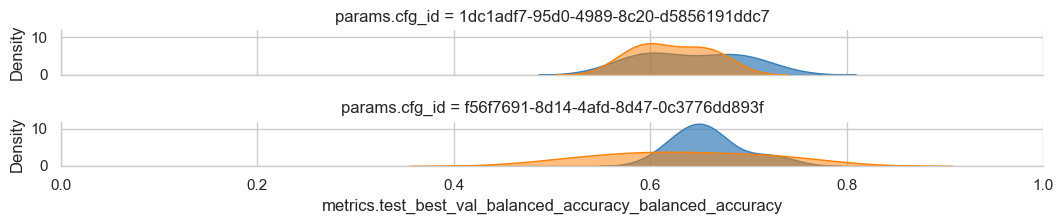

In [27]:
# Theme
metric2 = "metrics.test_best_val_balanced_accuracy_balanced_accuracy"
df2 = df[["params.cfg_id", metric, metric2]]
sns.set_theme(style="whitegrid", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':1})

# Calculate median for each row based on the first metric
median_order = df2.groupby("params.cfg_id")[metric].median().sort_values().index

# Create a grid with a row for each configuration, ordered by the median of the first metric
g = sns.FacetGrid(df2, row="params.cfg_id", hue="params.cfg_id", aspect=9, height=1.2, xlim=(0, 1), row_order=median_order)

# Map Kernel Density Plot for each configuration
g.map_dataframe(sns.kdeplot, x=metric, color="#377eb8", fill=True, alpha=0.7)

# Map Kernel Density Plot for the second metric
g.map_dataframe(sns.kdeplot, x=metric2, color='#ff7f00', fill=True, alpha=0.5)


In [28]:

# Function to draw labels
def label(x, color, label):
    ax = plt.gca()  # Get current axis
    ax.text(0.01, .2, label, color='black', fontsize=10,
            ha="left", va="center", transform=ax.transAxes)

# Iterate grid to plot labels
g.map(label, "params.cfg_id")

# Adjust subplots to create overlap
g.fig.subplots_adjust(hspace=-0.5)

# Remove subplot titles
g.set_titles("")

# Remove y-axis ticks and label, set x-axis label
g.set(yticks=[], ylabel="", xlabel="Balanced Accuracy")

# Remove left spine
g.despine(left=True)

# Set title
plt.suptitle("Performance on the Validation and Test Set for each configuration", y=0.98)
plt.figtext(0.88, 0.95, f"Concept: {concept}", ha="center", va="center", fontsize=12, color="gray")
plt.figtext(0.9, 0.88, f"Attr cfg: {attribute_config}", ha="center", va="center", fontsize=12, color="gray")
plt.figtext(0.9, 0.8, f"Randomize = {randomize}", ha="center", va="center", fontsize=12, color="gray")

# Customize the legend
legend = plt.legend(title='', loc='upper left')
legend.set_bbox_to_anchor((0.00, 1.6))  
legend.get_frame().set_facecolor('#ffffff')

# Set custom labels
legend_labels = ['Validation', 'Test']
for text, label in zip(legend.get_texts(), legend_labels):
    text.set_text(label)

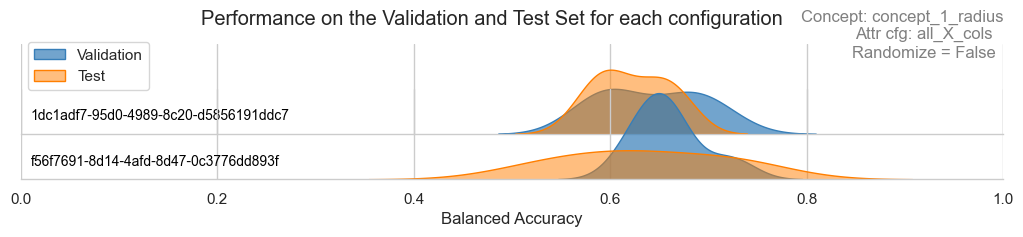

In [29]:
plt.show()